In [1]:
import os
import pandas as pd
import pyjags
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

In [2]:
operaciones = pd.read_excel('codi_ops.xlsx', sheet_name='Hoja1')
operaciones = operaciones.loc[operaciones['fecha'] >= "2023-01-01"]
operaciones['t'] = np.arange(0, len(operaciones))
print(operaciones.shape[0])
operaciones.head()

828


,fecha,total,t
1189,2023-01-01,4267,0
1190,2023-01-02,10947,1
1191,2023-01-03,11136,2
1192,2023-01-04,10930,3
1193,2023-01-05,12247,4


### Ejemplo de caminata aleatoria en un modelo líneal dinámico

In [15]:
# Datos
y = operaciones['total'].values
T = len(y)
data = {"y":y, "T":T}

# Modelo
with open("ej1a.txt", "r") as f:
    model_text = f.read()


# Parámetros a monitorear
params = ["mu", "ypred"]

model = pyjags.Model(model_text, data=data, chains=2,  adapt = 5000)

# Burn-in
model.update(5000)

samples = model.sample(10000, vars=params)


updating: iterations 10000 of 10000, elapsed 0:00:01, remaining 0:00:00
sampling: iterations 20000 of 20000, elapsed 0:00:03, remaining 0:00:00


In [16]:
# Médidas de convergencia
idata = az.from_pyjags(samples)
summary = az.summary(idata, var_names=["mu"], round_to=4)

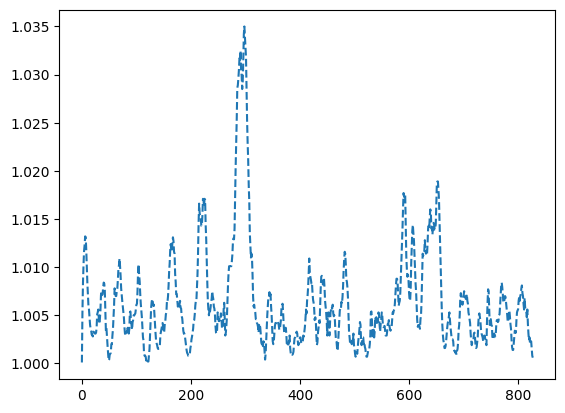

In [18]:
# Realizamos una gráfica de los rhat de mu
fig, ax = plt.subplots()
ax.plot(np.arange(summary.shape[0]),summary['r_hat'], '--')

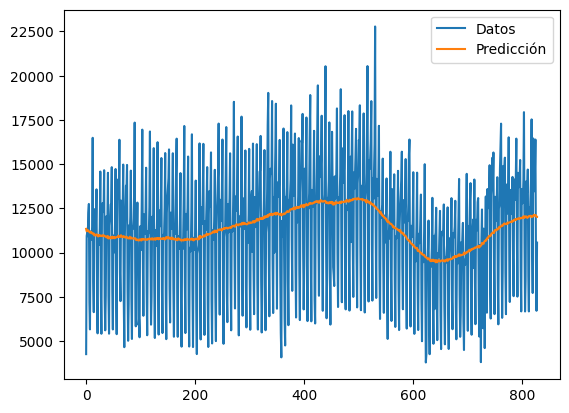

In [ ]:
# Gráfica de predicciones
y_pred = samples['ypred'][:,:,0]
y_pred_mean = np.mean(y_pred, axis=1)

fig, ax = plt.subplots()
ax.plot(operaciones['t'], operaciones['total'], label='Datos')
ax.plot(operaciones['t'], y_pred_mean, label='Predicción')
ax.legend()

### Ejemplo de tendencia estocástica en un modelo líneal dinámico

In [26]:
# Datos
y = operaciones['total'].values
T = len(y)
data = {"y":y, "T":T}

# Modelo
with open("ej1b.txt", "r") as f:
    model_text = f.read()


# Parámetros a monitorear
params = ["mu", "beta","ypred"]

model = pyjags.Model(model_text, data=data, chains=2,  adapt = 5000)

# Burn-in
model.update(5000)

samples = model.sample(10000, vars=params)

updating: iterations 10000 of 10000, elapsed 0:00:02, remaining 0:00:00
sampling: iterations 20000 of 20000, elapsed 0:00:05, remaining 0:00:00


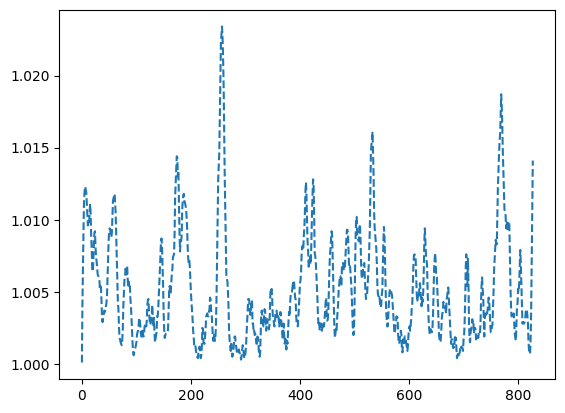

In [27]:
# Médidas de convergencia
idata = az.from_pyjags(samples)
summary = az.summary(idata, var_names=["mu"], round_to=4)

# Realizamos una gráfica de los rhat de mu
fig, ax = plt.subplots()
ax.plot(np.arange(summary.shape[0]),summary['r_hat'], '--')


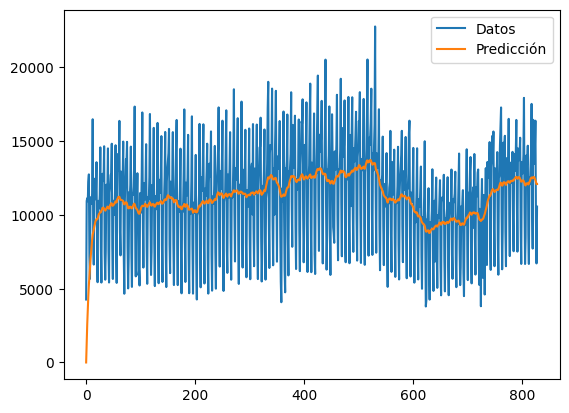

In [37]:
# Gráfica de predicciones
y_pred_combined = np.concatenate([
    samples['ypred'][:, :, 0],
    samples['ypred'][:, :, 1]
], axis=1)  # → shape: (2*n_samples, T)
y_pred_mean = y_pred_combined.mean(axis=1)

fig, ax = plt.subplots()
ax.plot(operaciones['t'], operaciones['total'], label='Datos')
ax.plot(operaciones['t'], y_pred_mean, label='Predicción')
ax.legend()